In [248]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [249]:
df = pd.read_csv('titanic_train.csv')

In [250]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So here we can see that age col and cabin col has null values in the dataset

In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age col has 177 Null values and cabin col has 687 Null values  out of 891 values

In [253]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Passenger Id and Name col has all the unique values and these cols are not that much important so we can drop these cols

In [1]:
#Lets check the correlation between Age col and Pclass col 

In [254]:
cor = df['Age'].corr(df['Pclass'])
print(cor)


-0.36922601531551724


In [255]:
cor = df['Age'].corr(df['Survived'])
print(cor)

-0.07722109457217759


In [256]:
cor = df['PassengerId'].corr(df['Survived'])
print(cor)

-0.0050066607670664846


so here as we can see Passenger Id has very less correlation with the Survived col 

In [2]:
# Dropping Passenger Id col and Name col 

In [257]:
df.drop('PassengerId',axis=1,inplace = True)

In [258]:
df.drop('Name',axis=1,inplace = True)

In [259]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [260]:
# canbin column has 687 null values out of 891 values so this column might not be that much important. so it is better to drop this col

In [261]:
df.drop('Cabin',axis=1,inplace=True)

In [262]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [263]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [264]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [3]:
# Lets check the frequency of the cols in the dataframe

In [265]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


Embarked
S    644
C    168
Q     77
Name: count, dt

In [4]:
# Separating categorical and numerical cols 

In [266]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df.dtypes[i]== 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

print('categorical cols :',cat_col)
print('\n')
print('Numerical cols :',num_col)





categorical cols : ['Sex', 'Ticket', 'Embarked']


Numerical cols : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


so out of Nine cols three cols are categorical type 

Lets encode these categorical cols into a numerical cols

In [5]:
# Here I use Ordinal Encoder for encoding

In [267]:
from sklearn.preprocessing import OrdinalEncoder

In [268]:
OE = OrdinalEncoder()

In [269]:
for i in df.columns:
    if df.dtypes[i]=='object':
      df[i]=OE.fit_transform(df[i].values.reshape(-1,1))  

In [270]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,101.0,13.0000,2.0
887,1,1,0.0,19.0,0,0,14.0,30.0000,2.0
888,0,3,0.0,NaN,1,2,675.0,23.4500,2.0
889,1,1,1.0,26.0,0,0,8.0,30.0000,0.0


Now data types of every cols are in Numerical type but still there are missing values so we have to take care of them

In [271]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [272]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Sex
1.0    577
0.0    314
Name: count, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Ticket
333.0    7
568.0    7
80.0     7
249.0    6
566.0    6
        ..
513.0    1
98.0     1
212.0    1
606.0    1
466.0    1
Name: count, Length: 681, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


Embarked
2.0    644
0.0    168
1.0     77
Name: count, dtype: int64




In [273]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Here Age is might be a crucial column but here too many null values are present. so here it will not be a good choice to fill these values with medians.
Lets use KNN imputer here 

In [274]:
from sklearn.impute import KNNImputer

In [275]:
ncols = df.select_dtypes(include=[np.number])
KNNI = KNNImputer(n_neighbors=7)
df_new = KNNI.fit_transform(ncols)
df_new = pd.DataFrame(df_new, columns=ncols.columns)

In [276]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,1.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,0.0,3.0,0.0,25.0,1.0,2.0,675.0,23.4500,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


Now the Null values of the Age col is filled by the use of KNN Imputer 

In [277]:
df_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now no null values are present

In [278]:
df=df_new

mean value of the age col is 29.74

In [279]:
df['Age'].mean()

29.745383998717333

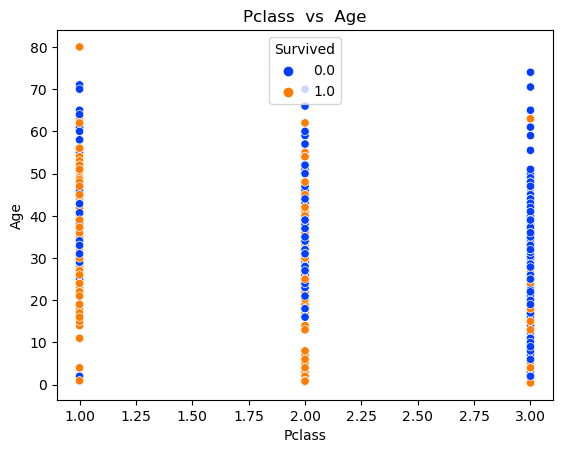

In [280]:
plt.title('Pclass  vs  Age')
sns.scatterplot(x='Pclass',y='Age',data= df ,hue='Survived',palette= "bright" )
plt.show()

Here we can see that Death rate of the Pclass == 1 according to the age is higher than the other Classes 

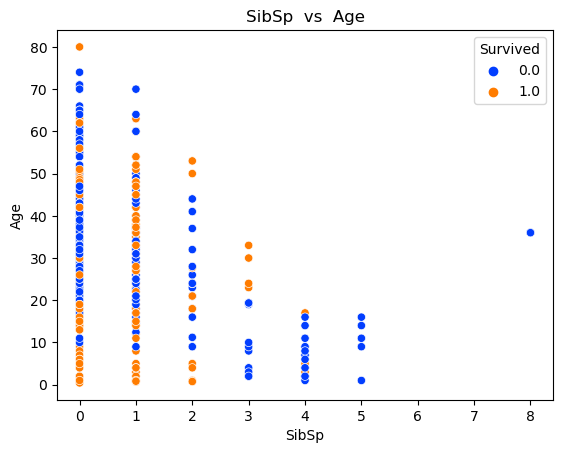

In [281]:
plt.title('SibSp  vs  Age')
sns.scatterplot(x='SibSp',y='Age',data= df ,hue='Survived',palette= "bright" )
plt.show()

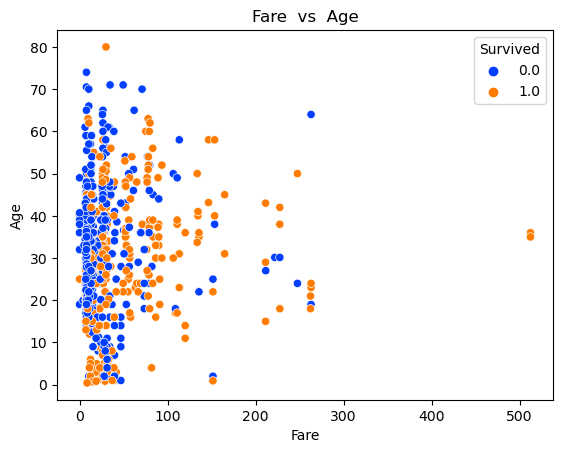

In [282]:
plt.title('Fare  vs  Age')
sns.scatterplot(x='Fare',y='Age',data= df ,hue='Survived',palette= "bright" )
plt.show()

As the fare increases death rate is decreases 

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Ticket    891 non-null    float64
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [284]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.745384,0.523008,0.381594,338.528620,32.204208,1.535193
std,0.486592,0.836071,0.477990,13.389134,1.102743,0.806057,200.850657,49.693429,0.791329
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.285714,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.428571,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.785714,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


According to the statistical description we can see that cols (sibsp,parch and fare ) has right skewness because here mean is greater than median.

And there may be a chance of having outliers in the cols Fare and Age. because there is a huge gap between 75th percentile and the max value

In [8]:
# Lets plot the dist plot and check the distribution of the datas in each cols

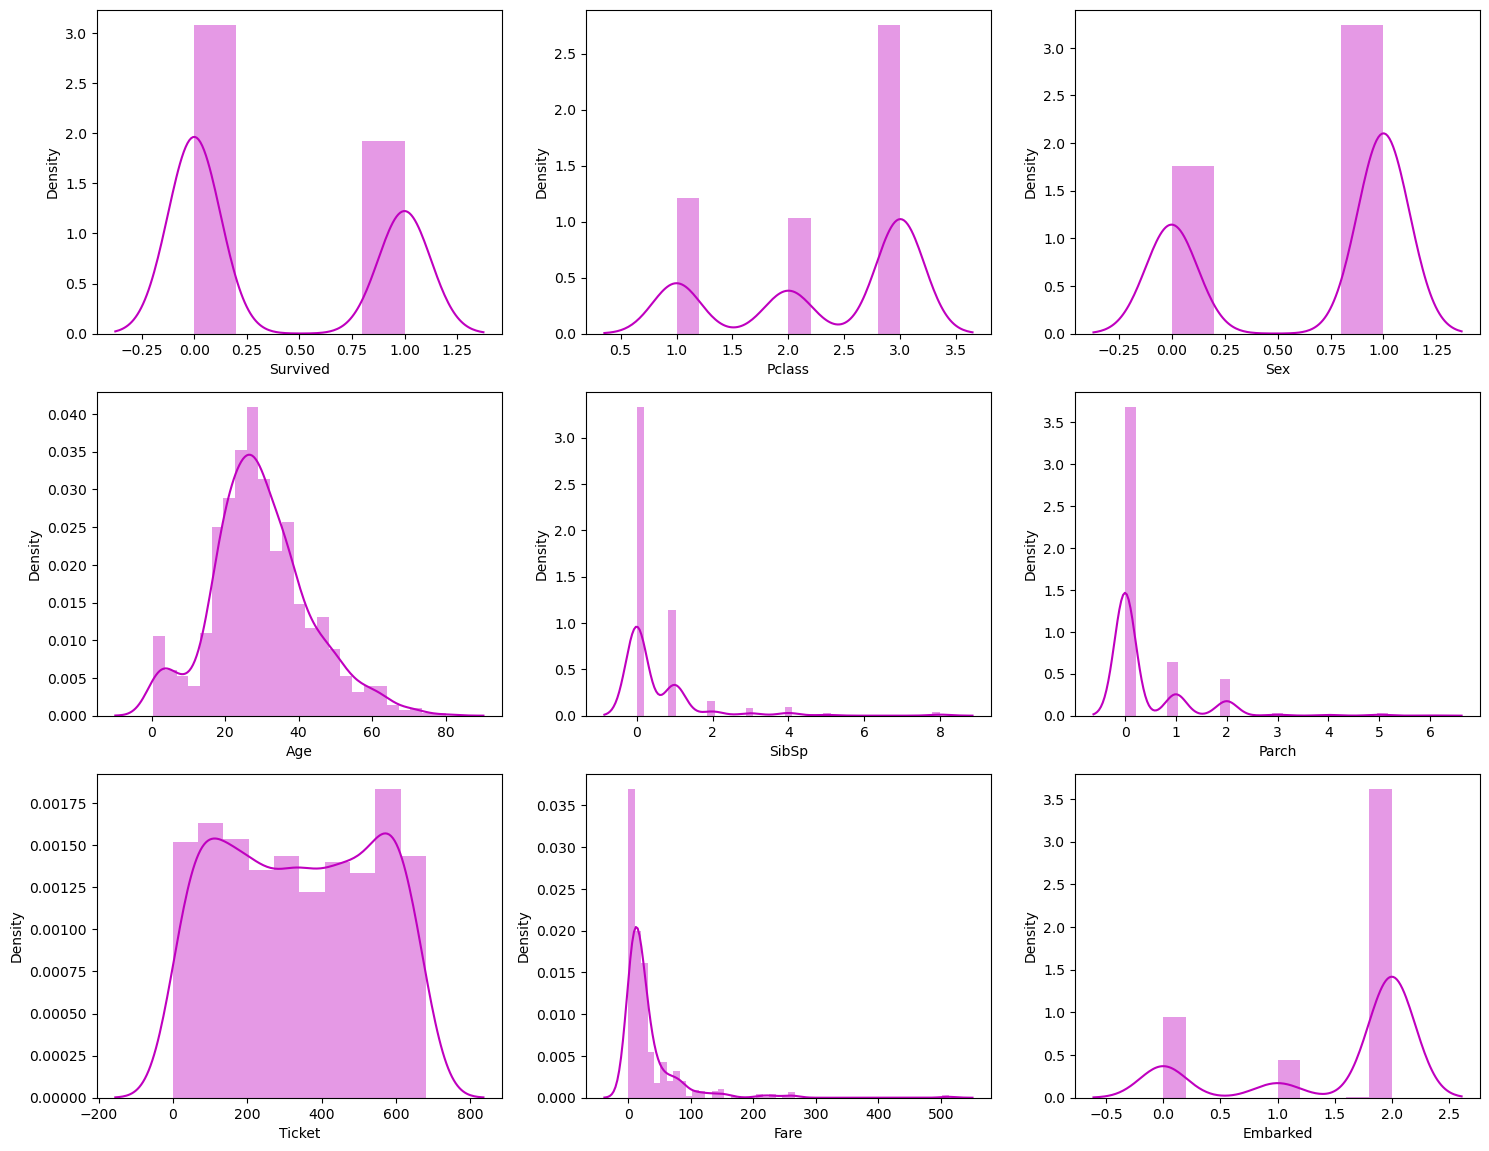

In [285]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=10:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

In [286]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.395920
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Embarked   -1.261361
dtype: float64

In [9]:
# After checking skewness we can see sibsp,parch and fare col has high skewness

In [287]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

Selecting those cols which has skewness and then stored in a variable named a

In [288]:
a=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked']

In [11]:
# Removing the skewness by using Cuberoot technique 
# Before I use squareroot and logarithmic technique to remove the skewness but I did not get that much good result

In [289]:
curr=df[a]

In [290]:
for i in a:
    df[i]=np.cbrt(df[i])

In [291]:
df.skew()

Survived    0.478523
Pclass     -0.776838
Sex        -0.618921
Age         0.395920
SibSp       1.033059
Parch       1.348334
Ticket      0.000246
Fare        1.230382
Embarked   -1.520026
dtype: float64

A little bit skewness is present but that will not effect that much

In [12]:
# Plotting the kde plot to check the distribution after removing the skewness

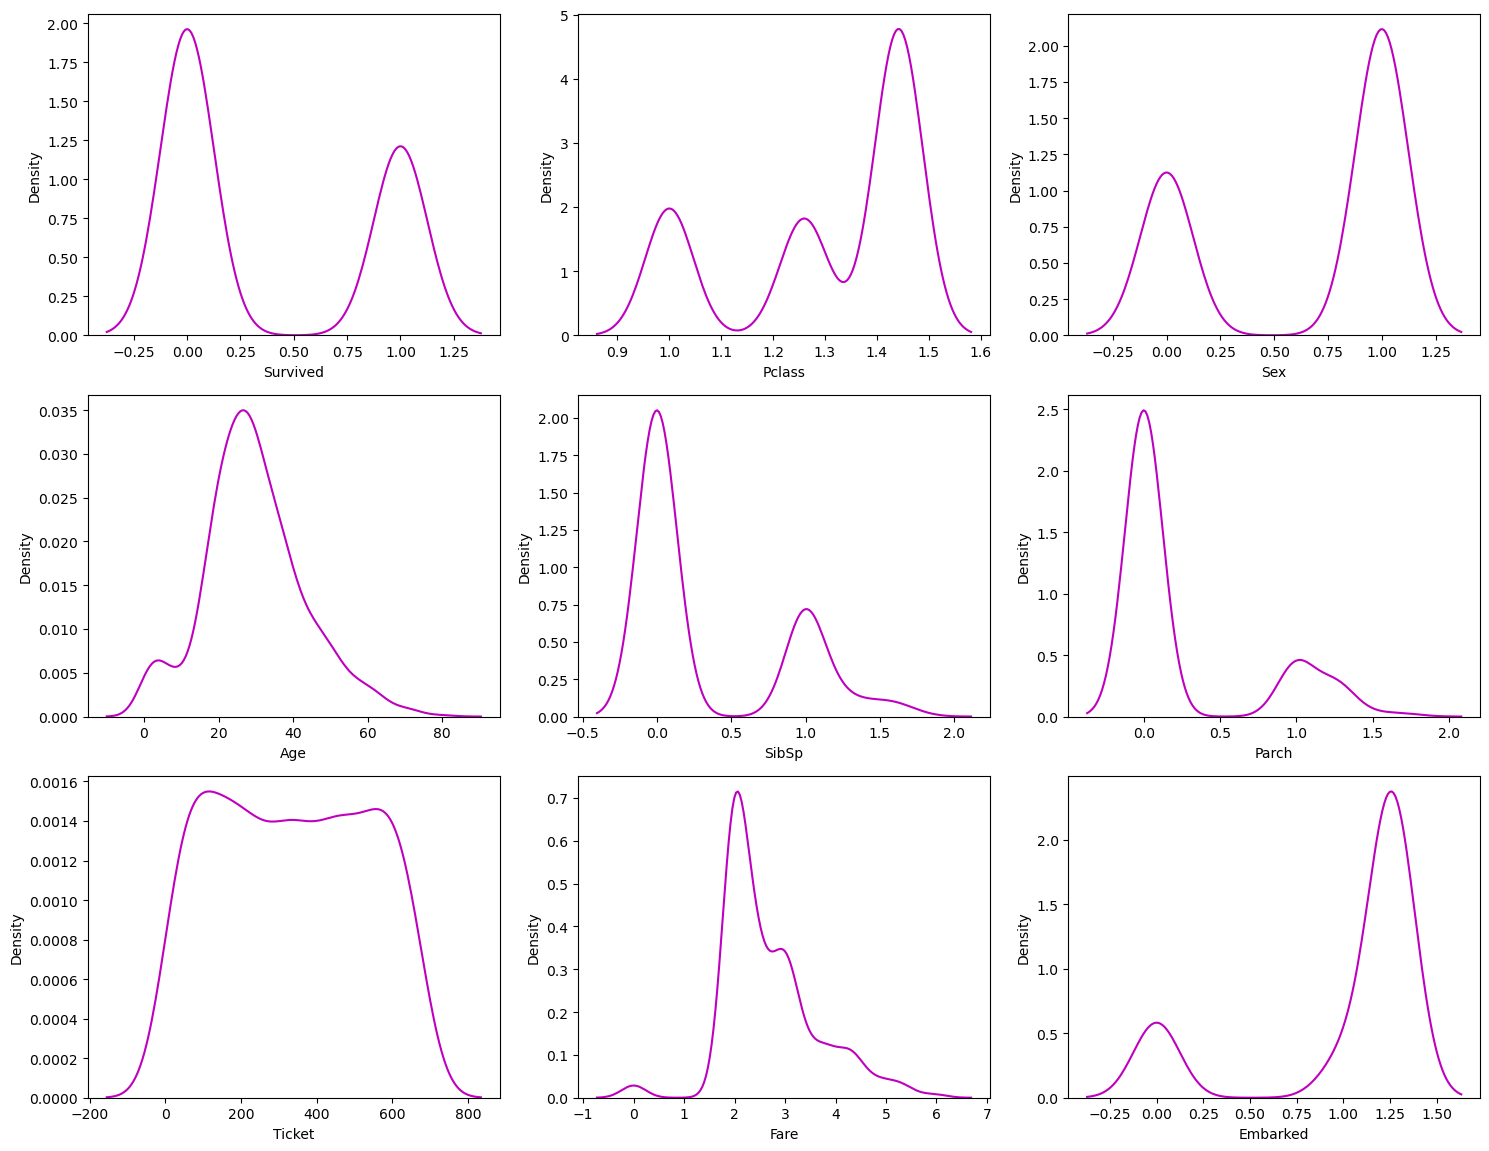

In [320]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=10:
        ax=plt.subplot(4,3,plotnum)
        sns.kdeplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

Skewness is almost removed

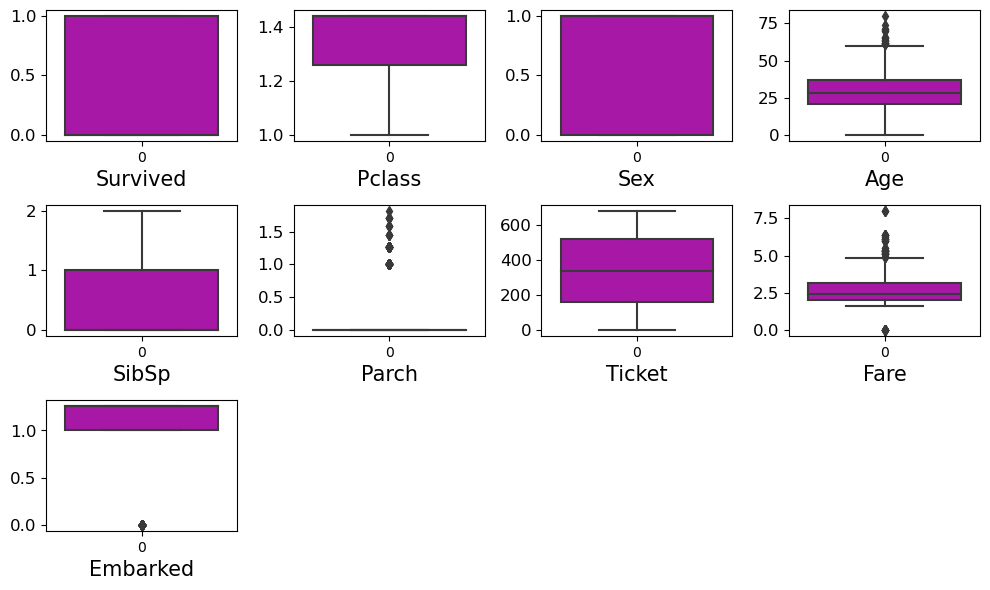

In [294]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

Parch,Age and Fare cols has outliers 

Lets remove the outliers by using zscore method

In [297]:
curr=df[a]

In [298]:
from scipy.stats import zscore

In [299]:
z=np.abs(zscore(curr))

In [300]:
df_new=df[(z<3).all(axis=1)]

In [301]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.442250,1.0,22.0,1.0,0.000000,523.0,1.935438,1.259921
1,1.0,1.000000,0.0,38.0,1.0,0.000000,596.0,4.146318,0.000000
2,1.0,1.442250,0.0,26.0,0.0,0.000000,669.0,1.993730,1.259921
3,1.0,1.000000,0.0,35.0,1.0,0.000000,49.0,3.758647,1.259921
4,0.0,1.442250,1.0,35.0,0.0,0.000000,472.0,2.004158,1.259921
...,...,...,...,...,...,...,...,...,...
886,0.0,1.259921,1.0,27.0,0.0,0.000000,101.0,2.351335,1.259921
887,1.0,1.000000,0.0,19.0,0.0,0.000000,14.0,3.107233,1.259921
888,0.0,1.442250,0.0,25.0,1.0,1.259921,675.0,2.862294,1.259921
889,1.0,1.000000,1.0,26.0,0.0,0.000000,8.0,3.107233,0.000000


Now no of rows is reduced from 891 to 867

In [302]:
df=df_new

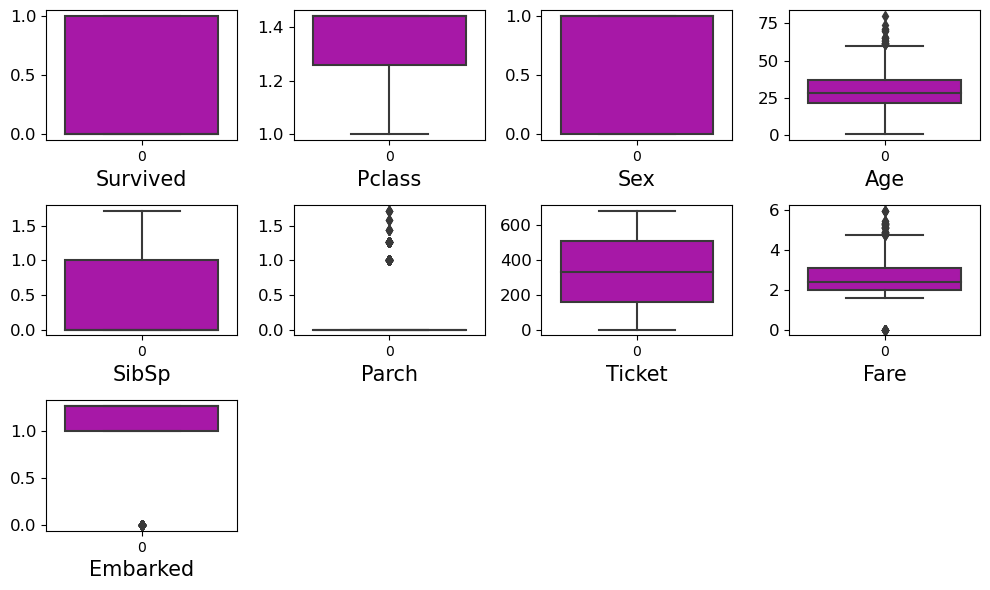

In [303]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

In [304]:
cor = df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.324175,-0.543998,-0.054920,0.091470,0.148363,-0.175076,0.337280,-0.151621
Pclass,-0.324175,1.000000,0.122448,-0.396177,-0.035244,-0.002791,0.343566,-0.683234,0.199646
Sex,-0.543998,0.122448,1.000000,0.093078,-0.185474,-0.257374,0.072546,-0.261765,0.086196
Age,-0.054920,-0.396177,0.093078,1.000000,-0.219674,-0.282057,-0.093095,0.122997,-0.007432
SibSp,0.091470,-0.035244,-0.185474,-0.219674,1.000000,0.429032,0.005764,0.362858,-0.014993
Parch,0.148363,-0.002791,-0.257374,-0.282057,0.429032,1.000000,-0.015529,0.321774,-0.007884
Ticket,-0.175076,0.343566,0.072546,-0.093095,0.005764,-0.015529,1.000000,-0.171362,0.045732
Fare,0.337280,-0.683234,-0.261765,0.122997,0.362858,0.321774,-0.171362,1.000000,-0.214999
Embarked,-0.151621,0.199646,0.086196,-0.007432,-0.014993,-0.007884,0.045732,-0.214999,1.000000


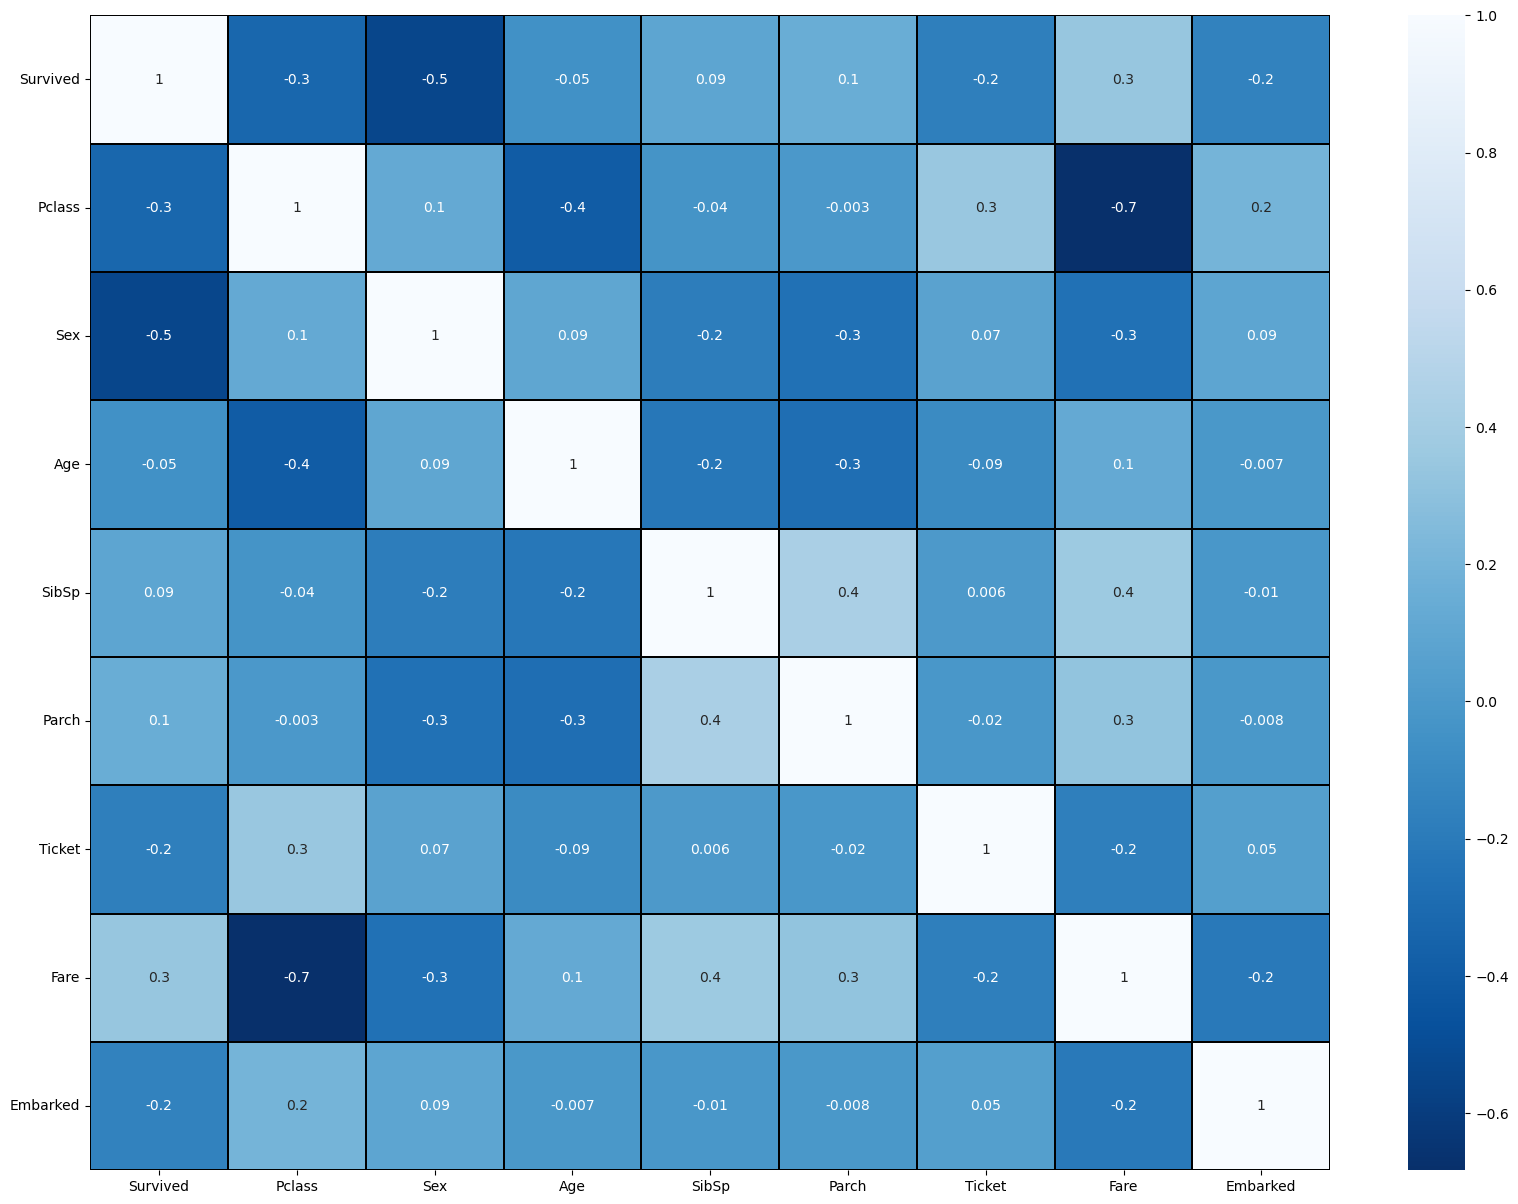

In [305]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [306]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.337280
Parch       0.148363
SibSp       0.091470
Age        -0.054920
Embarked   -0.151621
Ticket     -0.175076
Pclass     -0.324175
Sex        -0.543998
Name: Survived, dtype: float64

col (Sex,Pclass and Fare) has the highest correlation with the target col

In [307]:
df['Survived'].value_counts()

Survived
0.0    536
1.0    331
Name: count, dtype: int64

Survived col is little bit unbalanced 

In [13]:
# Creating X and Y 

In [308]:
x=df.iloc[:,1:]

In [310]:
y=df.iloc[:,0]

In [14]:
# Checking the variance inflation factor for the multicolinearity purpose

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [315]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds


,col,vif
0,Pclass,16.316641
1,Sex,3.190952
2,Age,6.596414
3,SibSp,1.960715
4,Parch,1.821750
5,Ticket,4.281622
6,Fare,9.082151
7,Embarked,5.721357


Here we can see that Pclass col has high variance inflation factor. but still I will not drop this col. because among all these cols Pclass is very important col

In [15]:
# Lets create Regression plot to check linearity of these cols

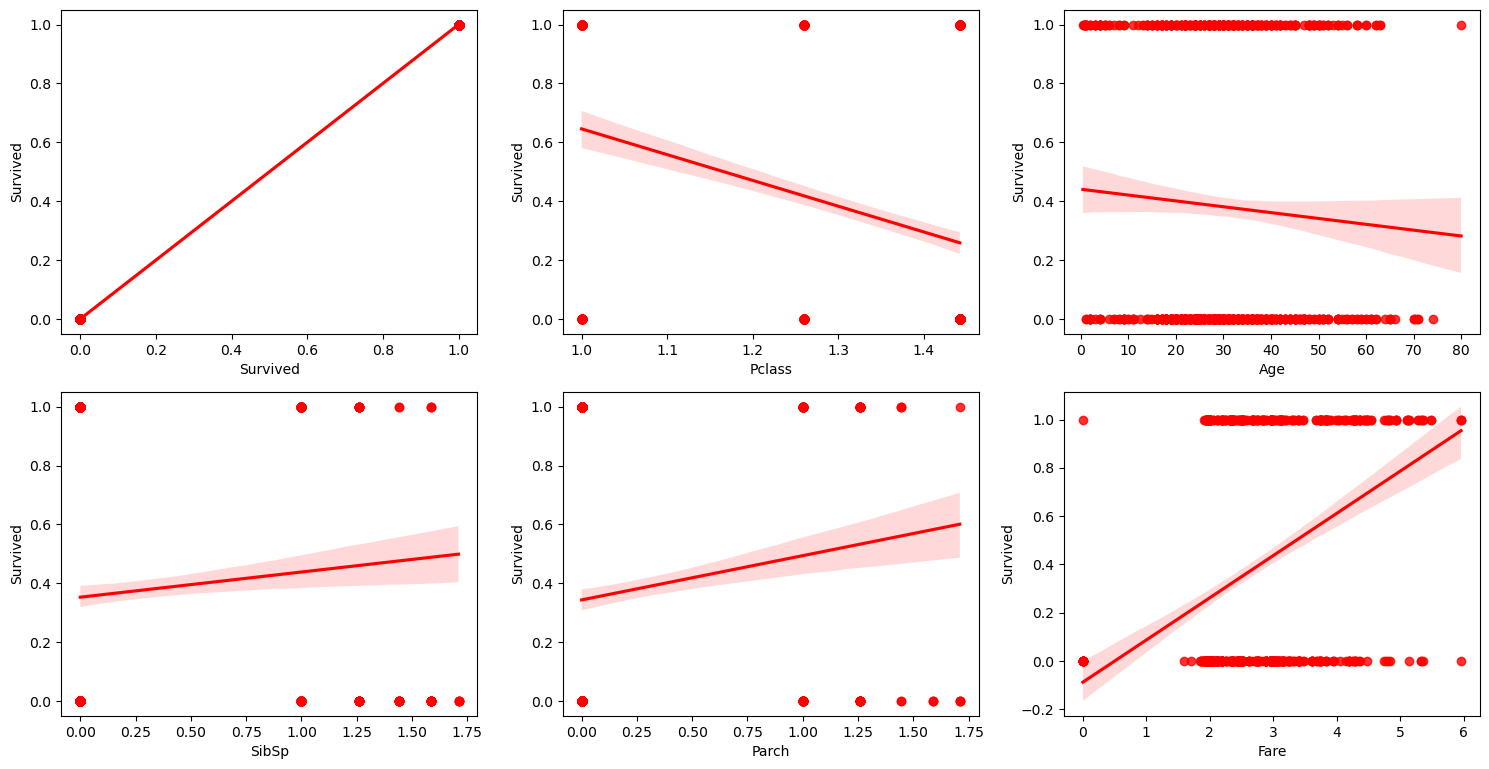

In [317]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in num_col:
    if plotnum<=10:
        ax=plt.subplot(4,3,plotnum)
        sns.regplot(x=i,y='Survived',data=df,color='red')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

Here We can see that Fare col has High linear relationship with the target value

In [16]:
# Balancing the dataset by using SMOTE technique

In [318]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [319]:
y1.value_counts()

Survived
0.0    536
1.0    536
Name: count, dtype: int64

using standard scaling technique to make the distribution of our dataset into normal distribution

In [321]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x.columns)
x1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.852776,0.871563,-0.569663,1.268174,-0.569562,0.968498,-0.874490,0.556235
1,-1.562782,-1.210869,0.624827,1.268174,-0.569562,1.327548,1.450067,-2.065435
2,0.852776,-1.210869,-0.271041,-0.695476,-0.569562,1.686597,-0.813201,0.556235
3,-1.562782,-1.210869,0.400860,1.268174,-0.569562,-1.362866,1.042463,0.556235
4,0.852776,0.871563,0.400860,-0.695476,-0.569562,0.717655,-0.802237,0.556235
...,...,...,...,...,...,...,...,...
1067,-0.143098,-1.210869,1.091945,0.110044,0.678621,-1.048334,0.205376,0.556235
1068,-1.562782,0.871563,0.215234,-0.695476,-0.569562,-1.570088,0.227186,-1.134206
1069,-0.143098,-1.210869,0.114420,1.268174,-0.569562,-1.059439,0.205376,0.556235
1070,-1.562782,0.454338,-0.435442,0.874748,-0.035332,-1.321556,0.922794,-1.540171


In [323]:
x1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.852776,0.871563,-0.569663,1.268174,-0.569562,0.968498,-0.874490,0.556235
1,-1.562782,-1.210869,0.624827,1.268174,-0.569562,1.327548,1.450067,-2.065435
2,0.852776,-1.210869,-0.271041,-0.695476,-0.569562,1.686597,-0.813201,0.556235
3,-1.562782,-1.210869,0.400860,1.268174,-0.569562,-1.362866,1.042463,0.556235
4,0.852776,0.871563,0.400860,-0.695476,-0.569562,0.717655,-0.802237,0.556235
...,...,...,...,...,...,...,...,...
1067,-0.143098,-1.210869,1.091945,0.110044,0.678621,-1.048334,0.205376,0.556235
1068,-1.562782,0.871563,0.215234,-0.695476,-0.569562,-1.570088,0.227186,-1.134206
1069,-0.143098,-1.210869,0.114420,1.268174,-0.569562,-1.059439,0.205376,0.556235
1070,-1.562782,0.454338,-0.435442,0.874748,-0.035332,-1.321556,0.922794,-1.540171


In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
# checking the best random_state value 

In [325]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs) 

best acc : 0.9069767441860465 random_state : 28


In [18]:
# splitting the dataset based on the best random_state value

In [327]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [328]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(857, 8) (857,) (215, 8) (215,)


In [19]:
# Importing all the related classification models

In [329]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [20]:
# Making the instances of all models

In [330]:
RFC=RandomForestClassifier()
ET=ExtraTreesClassifier()
LR=LogisticRegression()
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
MNB=MultinomialNB()
GNB=GaussianNB()

In [21]:
# Making a list of the all instances

In [334]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [335]:
from sklearn.metrics import roc_auc_score

In [22]:
# In this loop I am training my model for each algorithmn to check the roc_auc_scorel,confusion_matrix,classification_report, cross_val_score and the difference between mean cross_val_score and accuracy_score

In [339]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('accuracy will be :',roc_auc_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x,y,cv=10,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',accuracy_score(y_test,pred)-score.mean())
    print('\n')
    
    

This is for : RandomForestClassifier()
accuracy will be : 0.9178260869565217
confusion matrix will be : 

[[ 94   6]
 [ 12 103]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       100
         1.0       0.94      0.90      0.92       115

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215

Cross val score will be : [0.86167228 0.83417508 0.75112233 0.88215488 0.92873176 0.87205387
 0.86043285 0.88307604 0.9193825  0.90423099]
Mean cv : 0.8697032602508001
Difference between cv and accuracy_score will be : 0.04657580951664175


This is for : ExtraTreesClassifier()
accuracy will be : 0.8817391304347827
confusion matrix will be : 

[[92  8]
 [18 97]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       100
   

So our best model is RandomForestClassifier

In [23]:
# Lets do the hyper parameter tuning by using grid search cv

In [340]:
from sklearn.model_selection import GridSearchCV

In [342]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None],'bootstrap':['bool',True]}

In [345]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)

In [346]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['bool', True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [347]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 200,
 'n_jobs': -1}

In [348]:
final_model = RandomForestClassifier(criterion = "log_loss",bootstrap = True,max_depth=None,max_leaf_nodes=None,n_estimators=200,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.23255813953487


So our model accuracy comes out 90.23 %

In [24]:
# Plotting the Roc_curve

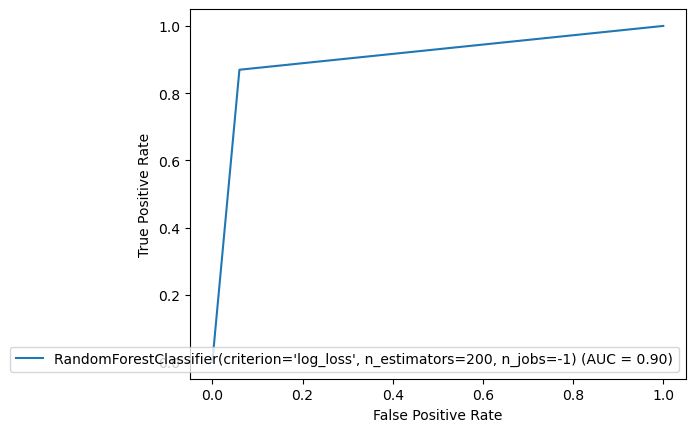

In [349]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [350]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.904782608695652

In [25]:
# Auc score will be 90.47%

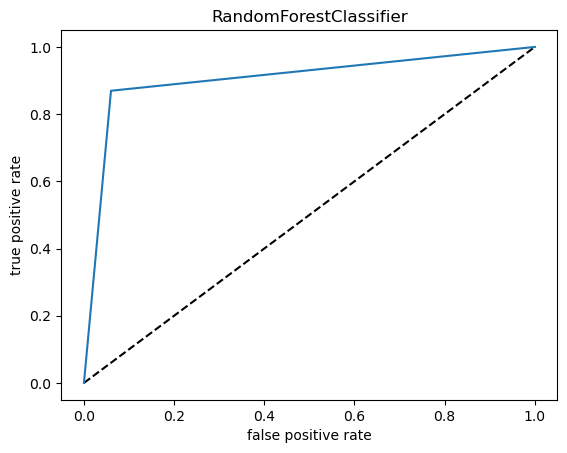

In [352]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()

Lets test our model

In [353]:
t=np.array([0.852776,	0.871563,	-0.569663,	1.268174,	-0.569562,	0.968498,	-0.874490,	0.556235]).reshape(1,-1)
final_model.predict(t)

array([0.])

In [356]:
#0

In [354]:
t=np.array([-1.562782,	-1.210869,	0.624827,	1.268174,	-0.569562,	1.327548,	1.450067,	-2.065435]).reshape(1,-1)
final_model.predict(t)

array([1.])

In [357]:
#1

In [355]:
t=np.array([0.852776,	0.871563,	0.400860,	-0.695476,	-0.569562,	0.717655,	-0.802237,	0.556235]).reshape(1,-1)
final_model.predict(t)

array([0.])

In [358]:
#0